In [1]:
from datetime import datetime, timedelta
import datetime as dt

import pandas as pd
import numpy as np

import torch

import matplotlib.pyplot as plt
%matplotlib inline

import orbit
from orbit.models import ARMA
from orbit.utils.simulation import make_trend, make_regression
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components

In [2]:
%load_ext autoreload
%autoreload 2

<class 'numpy.ndarray'>


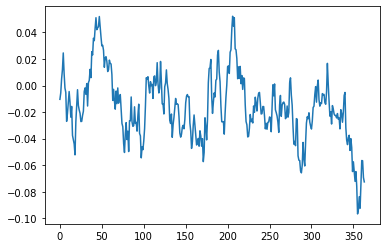

In [3]:
# make the data
n = 365 # hourly for 1 year 

x0 = np.random.normal(0, 1, n)
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
x4 = np.random.normal(0, 1, n)
x5 = np.random.normal(0, 1, n)
x6 = np.random.normal(0, 1, n)
x7 = np.random.normal(0, 1, n)
x8 = np.random.normal(0, 1, n)
x9 = np.random.normal(0, 1, n)

X = np.vstack([x0, x1]).transpose()
   
eta = np.random.normal(0, 0.01, n)

rho = [0.95, 0.0, 0.0]
beta = [0.00, -0.00]
y = eta.copy()
for i in range(2, n):
    y[i] = rho[0]*y[i-1] + rho[1]*y[i-2] + rho[2]*y[i-7] + x0[i]*beta[0]+ x1[i]*beta[1]+ eta[i]

     
#plt.plot(y)
plt.plot(y[1:500])
print(type(X))

#making the date stuff 
def daterange(start_date, end_date):
    delta = timedelta(hours=1)
    while start_date < end_date:
        yield start_date
        start_date += delta
        
hours = [datetime(2013, 1, 1, 14, 00)]        

start_date = datetime(2021, 1, 1, 00, 00)
end_date = datetime(2022, 1, 1, 00, 00)
i = 0
for single_date in daterange(start_date, end_date):
    hours[i]=hours.append(single_date.strftime("%Y-%m-%d %H:%M"))       
    i += i
hours = hours[1:(n+1)]
hours = [dt.datetime.strptime(hour, "%Y-%m-%d %H:%M") for hour in hours]

df = pd.DataFrame(X, columns=['a1', 'a2'])
df['hours'] = hours
df['y'] = y

df_train = df.iloc[0:180,:]
df_test = df.iloc[180:n,:]

In [4]:
mod = ARMA(
#         regressor_col=['a1', 'a2'],
        lm_first=0,
        estimator='stan-mcmc',
        date_col = 'hours',
        response_col = 'y',
        ar_lags = [1],
        ma_lags = [1] ,
)

mod.fit(df_train)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2d123c716d6326a2531857ba6be1fde7 NOW.
In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:771:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969:
/Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/9f/m35pbwgx1

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:781:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan_fit.hpp:15:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:393:11: note: in instantiation of member function 'boost::random::linear_congruential_engine<unsigned long long, 2521

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

In file included from /var/folders/9f/m35pbwgx13n2j29rjhpkcyg40000gn/T/pystan_1xz0ld0i/stanfit4anon_model_2d123c716d6326a2531857ba6be1fde7_3221284568115632775.cpp:780:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/edwinng/work/venv/orbit37/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/edwinng/work/venv/

152 warnings generated.
INFO:orbit:Sampling(PyStan) with chains:4, cores:8, temperature:1.0, warmups(per chain):225 and samples(per chain):25.


In [5]:
predicted_df = mod.predict(df_test)

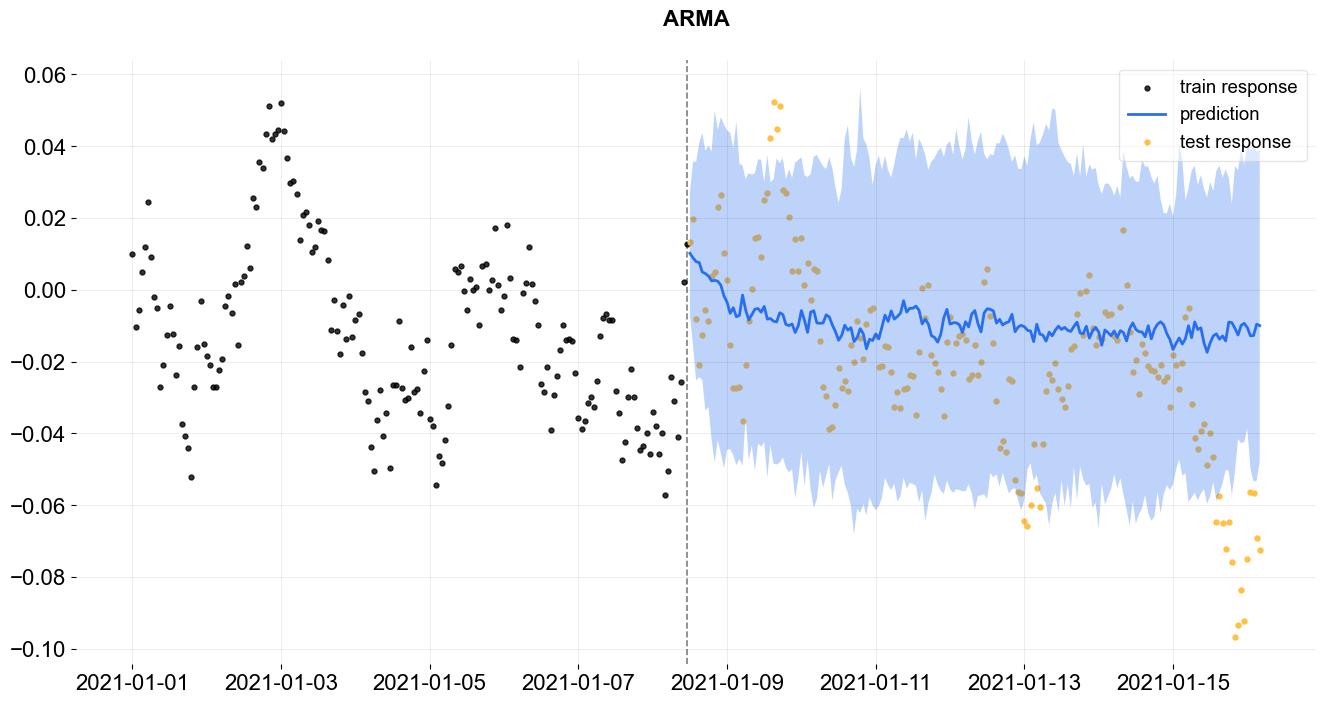

In [6]:
_ = plot_predicted_data(
    df_train, predicted_df, 
    date_col = 'hours', 
    actual_col = 'y', 
    title='ARMA', 
    test_actual_df=df_test
)